## Data PreProcessing

In [ ]:
import json
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
token = {"username":"atharvakarwande12","key":"92640a5728711f097a9282a14af7e7dc"}
with open('/content/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
# Install Kaggle library
!pip install -q kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d deadskull7/fer2013

 84% 81.0M/96.6M [00:01<00:00, 51.1MB/s]
100% 96.6M/96.6M [00:01<00:00, 74.0MB/s]


In [ ]:
from shutil import unpack_archive
unpack_archive('fer2013.zip', '/content')

In [ ]:
#Importing All The Required Librarie

import os                            # To perform operations like accessing flie location
import numpy as np                   # To perfroms operation on image
import pandas as pd                  # To handle dataset
from matplotlib import pyplot as plt # To view Images
%matplotlib inline

In [ ]:
# Reading Dataset
Data = pd.read_csv("fer2013.csv")

In [ ]:
# Viewing the fisrt 3 entries 
Data.head(3)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training


In [ ]:
print(Data.shape)

(35887, 3)


In [ ]:
# To convert the data to numpy
data = Data.values
print(data.shape)
print(data[0, 0])

(35887, 3)
0


In [ ]:
# Extracting the class or labels for each image
labels = data[:, 0]

In [ ]:
# Extracting pixel values of each entry
pixels = data[:,1]
print(type(pixels))   # Verifying the type of pixels
print(pixels.shape[0])

<class 'numpy.ndarray'>
35887


In [ ]:
# Creating an epmty np array to store the pixel values of each image
X = np.zeros((pixels.shape[0], 48*48))       # We are going to create a 1 channel grayscale image to accomodate only the first pixels
print(X.shape)

(35887, 2304)


In [ ]:
for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

In [ ]:
x = X
print(labels)
print(x)

[0 0 2 ... 0 3 2]
[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 17.  17.  16. ... 154. 133. 113.]
 [ 30.  28.  28. ...  35.  30.  28.]
 [ 19.  13.  14. ... 189. 199. 201.]]


In [ ]:
x=x/255

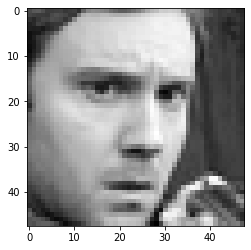

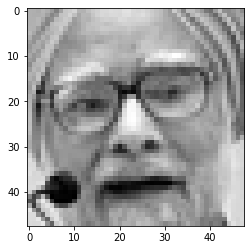

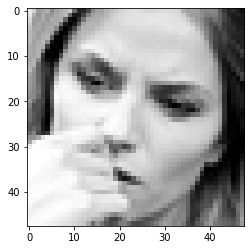

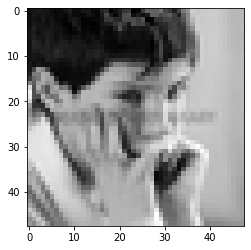

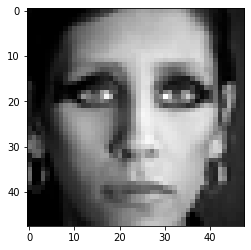

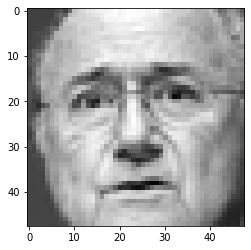

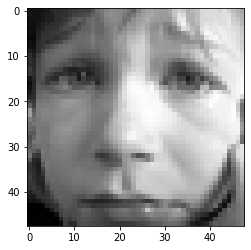

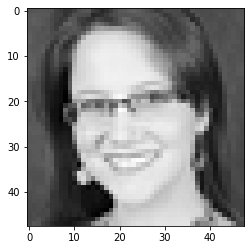

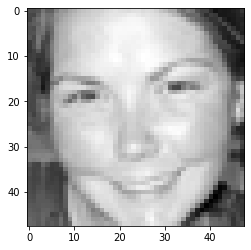

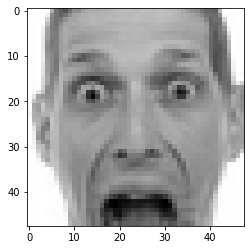

In [ ]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

# Training Keras Model

In [ ]:
X_train = x[0:28710, :]
Y_train = labels[0:28710]
print (X_train.shape, Y_train.shape)

X_crossval = x[28710:32300, :]
Y_crossval = labels[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(28710, 2304) (28710,)
(3590, 2304) (3590,)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], 48, 48,1))
X_crossval = X_crossval.reshape((X_crossval.shape[0],48, 48,1))
print(X_train.shape)

(28710, 48, 48, 1)


In [ ]:
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import np_utils

In [ ]:
print (labels.shape)
y_ = np_utils.to_categorical(labels, 7)
print (y_.shape)

(35887,)
(35887, 7)


In [ ]:
Y_train = y_[:28710]
Y_crossval = y_[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(3590, 48, 48, 1) (3590, 7)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,  
        zoom_range = 0.0,  
        width_shift_range=0.01,  
        height_shift_range=0.01,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D ,Convolution2D, Activation, SeparableConv2D, GlobalAveragePooling2D
from keras import callbacks
from keras.layers import BatchNormalization
from keras.utils import np_utils
import keras


In [ ]:
def swish_activation(x):
    return (keras.activations.sigmoid(x) * x)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48,48,1)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation=swish_activation))
model.add(Dropout(0.1))
model.add(Dense(7 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 96)       

In [ ]:
print(X_train.shape[0]//128)

224


In [ ]:
batch_size = 128
epochs = 30

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])


steps_per_epoch = X_train.shape[0] // batch_size
validation_steps = len((X_crossval, Y_crossval)) // batch_size

In [ ]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=steps_per_epoch,
                    callbacks= [callbacks.ModelCheckpoint(os.path.join('/content/drive/My Drive/TRF_FINAL_TASK','epoch_{epoch:02d}acc{val_accuracy:.4f}.h5'),monitor='val_accuracy', save_weights_only=False, save_best_only=False) ],
                    validation_data=(X_crossval, Y_crossval),
                    epochs = epochs, verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
224/224 [==============================] - 406s 2s/step - loss: 0.3998 - accuracy: 0.2394 - val_loss: 0.3891 - val_accuracy: 0.2493
Epoch 2/30
224/224 [==============================] - 402s 2s/step - loss: 0.3882 - accuracy: 0.2485 - val_loss: 0.3822 - val_accuracy: 0.2638
Epoch 3/30
224/224 [==============================] - 404s 2s/step - loss: 0.3627 - accuracy: 0.3315 - val_loss: 0.3337 - val_accuracy: 0.4084
Epoch 4/30
224/224 [==============================] - 405s 2s/step - loss: 0.3236 - accuracy: 0.4300 - val_loss: 0.3100 - val_accuracy: 0.4468
Epoch 5/30
224/224 [==============================] - 400s 2s/step - loss: 0.2980 - accuracy: 0.4929 - val_loss: 0.2857 - val_accuracy: 0.5053
Epoch 6/30
224/224 [==============================] - 403s 2s/step - loss: 0.2797 - accuracy: 0.5300 - val_loss: 0.2758 - val_accuracy: 0.5345
Epoch 7/30
224/224 [==============================] - 404s 2s/step

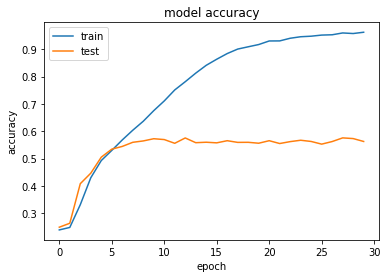

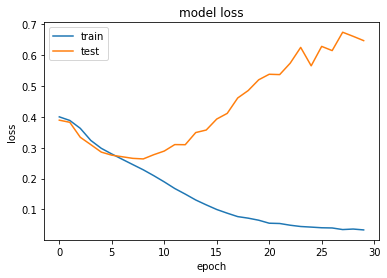

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/TRF_FINAL_TASK/Accuracy.png')
plt.show()
#plt.close()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/TRF_FINAL_TASK/Losses.png')
plt.show()
#plt.close()